<a href="https://colab.research.google.com/github/Ahmethan96/Data_science/blob/main/age_gender_race_prediction_with_mobilenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/My Drive/Sohan')

In [5]:
!pwd

/content/drive/My Drive/Sohan


In [6]:
import os
import zipfile

with zipfile.ZipFile('part1.zip', 'r') as zip_ref:
  zip_ref.extractall('data')

In [7]:
from PIL import Image
import os

data_dir = 'data/part1'
image_files = os.listdir(data_dir)

image_path = os.path.join(data_dir, image_files[0]) # check the type of data dir and image_files
image = Image.open(image_path)

name_of_image = image_files[0]

In [8]:
from IPython.display import display

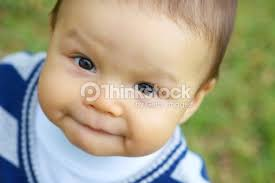

In [9]:
display(image)

In [10]:
print(name_of_image)

1_0_0_20161219140623097.jpg


In [11]:
print(type(image_files))

<class 'list'>


In [12]:
print(image_files[0])

1_0_0_20161219140623097.jpg


In [13]:
print(data_dir[0], end="")
print(data_dir[1], end="")
print(data_dir[2], end="")
print(data_dir[3], end="")

data

In [14]:
print(type(data_dir)) # data folder
print(type(image_files))# list of images in data_dir


<class 'str'>
<class 'list'>


* The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg


* [age] is an integer from 0 to 116, indicating the age


* [gender] is either 0 (male) or 1 (female)


* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).


* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [15]:
print(len(image_files)) # qunatiity of images in the dataset part1

10137


In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  #0 white 1 black 2 chinese 3 indian 4 hispanic
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.transforms import ToPILImage, ToTensor
import re
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#for dirname, _, filenames in os.walk('/kaggle/input/utkface-new/UTKFace'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
%pwd

'/content/drive/MyDrive/Sohan'

In [ ]:
# image_folder = "/kaggle/input/utkface-new/UTKFace"
file_names = []
ages = []
genders = []
races = []
file_id = []
image_array = []


for data in image_files:
  if data.endswith(".jpg"):
    if len(list(data.split("_"))) == 4:
      # print(data.split("_"))
      im = Image.open("/content/drive/MyDrive/Sohan/data/part1/" + data)
      numpy_data = asarray(im)
      age, gender, race, file_id = data.split("_")
      print(data)

      # print(f" the age is {age} years old, the gender is {gender}, the race is {race} and the file id is {file_id}")

      image_array.append(numpy_data)
      file_names.append(file_id)
      ages.append(age)
      genders.append(gender)
      races.append(race)


# for filename in os.listdir(image_folder):               #Iterating through filenames in the image folder
#     if filename.endswith(".jpg.chip.jpg"):
#         if len(list(filename.split("_"))) == 4:

#             im = Image.open(image_folder + '/' + filename) #Opening each Image iteratively
#             #print(filename.split("_"))
#             #print(len(list(filename.split("_"))))
#             numpydata = asarray(im)                         #Image into ndarray
#             age, gender, race, file_id = filename.split("_")
#             #print(age)
#                                             #Populating storage lists
#             image_array.append(numpydata)   #Images
#             file_names.append(file_id)      #Id of each image file
#             ages.append(age)                #Ages
#             genders.append(gender)          #Genders
#             races.append(race)              #Races

Görüntülenen çıkış son 5000 satıra kısaltıldı.
26_1_0_20170103181710200.jpg
26_1_0_20170103181852617.jpg
26_1_0_20170103181901521.jpg
26_1_0_20170103181926881.jpg
26_1_0_20170103181940954.jpg
26_1_0_20170103181948785.jpg
26_1_0_20170103182026289.jpg
26_1_0_20170103182040225.jpg
26_1_0_20170103182456297.jpg
26_1_0_20170103213110260.jpg
26_1_0_20170103224921463.jpg
26_1_0_20170103234817732.jpg
26_1_0_20170103235707476.jpg
26_1_0_20170104021254429.jpg
26_1_0_20170104021504132.jpg
26_1_0_20170104021534429.jpg
26_1_0_20170104022111485.jpg
26_1_0_20170104022424245.jpg
26_1_0_20170104165749289.jpg
26_1_0_20170104165807080.jpg
26_1_0_20170104233850235.jpg
26_1_0_20170104235143076.jpg
26_1_0_20170104235427939.jpg
26_1_0_20170105002839534.jpg
26_1_0_20170105003228731.jpg
26_1_0_20170105163250483.jpg
26_1_0_20170105163517523.jpg
26_1_0_20170105183644799.jpg
26_1_0_20170105183649031.jpg
26_1_0_20170105183657951.jpg
26_1_0_20170105183935352.jpg
26_1_0_20170109002353702.jpg
26_1_0_20170109002602686.

In [1]:
print(races)

NameError: ignored

In [1]:
# print(genders)
# for i in range(len(genders)) :
#     genders[i] = int(genders[i])
# print(genders)

In [ ]:
#Creation of the Dataframe
data = {
    "file_name": file_names,
    "age": ages,
    "gender": genders,
    "race": races,
    "image_array": image_array,
}

df = pd.DataFrame(data)
#print(df)
hashable_columns = ['file_name','age','gender','race']
#Searching for duplicates
duplicates = df.duplicated(subset=hashable_columns)
#Dropping duplicates
df = df.drop_duplicates(subset=hashable_columns)
df = df.reset_index()
#print(df)
#print(duplicates)

In [ ]:
#df['image_array'] = df['image_array'].apply(lambda x:torch.tensor(x))     #Image dataframe to tensors
#Age values  normalised
#df['age'] = df['age'].astype(float)
#df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())


In [ ]:
age_counts = df['age'].value_counts().sort_index()
print(age_counts)

1      1123
10      156
100      11
101       2
103       1
       ... 
92       13
93        5
95        9
96       17
99        9
Name: age, Length: 104, dtype: int64


In [ ]:
age_description = df['age'].describe()
#print(age_description)
print(df['age'].unique())

['26' '22' '21' '28' '17' '44' '35' '76' '36' '34' '18' '40' '45' '70'
 '67' '12' '24' '54' '4' '46' '38' '90' '72' '2' '23' '10' '16' '31' '1'
 '27' '63' '79' '50' '41' '75' '61' '29' '82' '42' '32' '13' '14' '25'
 '15' '85' '59' '66' '30' '20' '19' '3' '65' '51' '115' '64' '43' '37'
 '58' '49' '80' '5' '57' '53' '9' '55' '56' '33' '69' '60' '86' '8' '52'
 '62' '88' '47' '83' '48' '6' '78' '11' '39' '74' '89' '7' '77' '71' '92'
 '101' '73' '95' '68' '99' '96' '81' '84' '111' '87' '100' '93' '105'
 '103' '116' '110' '91']


count    22479.000000
mean        30.691623
std         16.796766
min          1.000000
25%         23.000000
50%         28.000000
75%         40.000000
max         70.000000
Name: age, dtype: float64


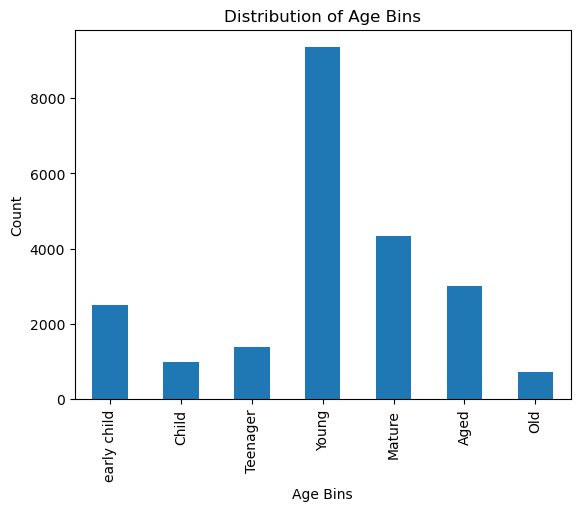

In [ ]:
#df['image_array'] = df['image_array'].apply(lambda x:torch.tensor(x))     #Image dataframe to tensors
#Age values  normalised
df['gender'] = df['gender'].astype(int)
df['race'] = df['race'].astype(int)
df['age'] = df['age'].astype(int)
df = df[df['age'] <= 70]
#df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
print(df['age'].describe())

# Define the age bins and labels
bins = [0, 7, 14, 21, 35, 49, 63,70]
labels = ['early child', 'Child', 'Teenager', 'Young', 'Mature', 'Aged', 'Old']

#Mapping Dictionary mapping age bin labels to indices
age_bin_to_index = {'early child': 0, 'Child': 1, 'Teenager': 2, 'Young': 3, 'Mature': 4, 'Aged': 5, 'Old': 6}

# Create a new column 'age_bin' for the age bins
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_bin'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Age Bins')
plt.ylabel('Count')
plt.xlabel('Age Bins')
plt.show()

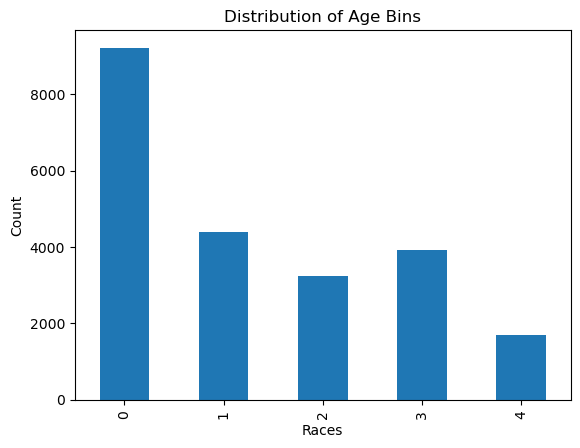

In [ ]:
df['race'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Age Bins')
plt.ylabel('Count')
plt.xlabel('Races')
plt.show()

In [ ]:
print(df['age_bin'].value_counts())


Young          9350
Mature         4343
Aged           3023
early child    2494
Teenager       1383
Child          1000
Old             739
Name: age_bin, dtype: int64


In [ ]:
print(df['gender'].value_counts())
print(df['race'].value_counts())

0    11785
1    10694
Name: gender, dtype: int64
0    9220
1    4398
3    3921
2    3254
4    1686
Name: race, dtype: int64


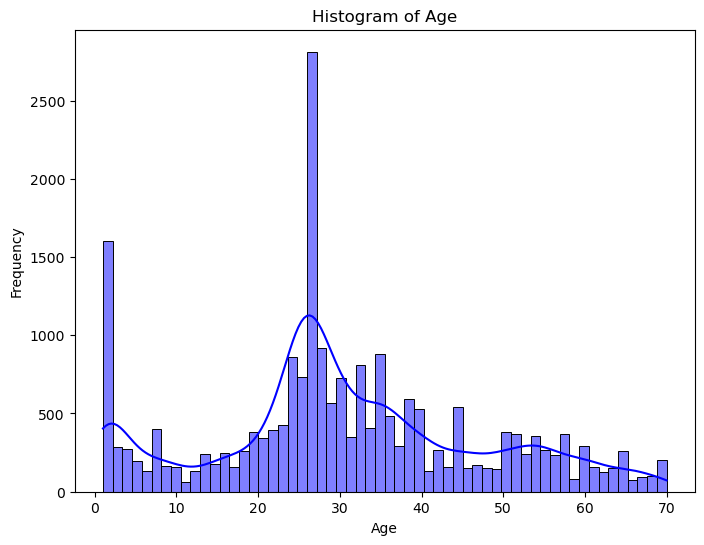

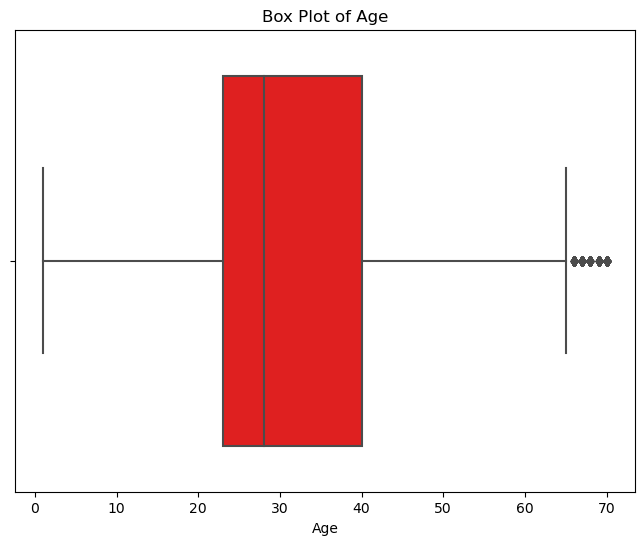

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='red')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
#df['image_array'] = df['image_array'].apply(lambda x:torch.tensor(x))     #Image dataframe to tensors

#Age values  normalised
#df['age'] = df['age'].astype(float)
#df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())



#Creating a custom dataset for the model
class CustomDataset(Dataset):
    def __init__(self,dataframe, transform=None): #Init fn
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self): #len
        return len(self.dataframe)

    def __getitem__(self, idx):                                 #Accessing each item from the dataframe

        image = self.dataframe.iloc[idx]['image_array']
        #age = self.dataframe.iloc[idx]['age']
        age_bin = self.dataframe.iloc[idx]['age_bin']
        print(idx)
        print(age_bin)
        if not isinstance(age_bin, str):
            if math.isnan(age_bin):
               return None
        age_bin_to_index = {'early child': 0, 'Child': 1, 'Teenager': 2, 'Young': 3, 'Mature': 4, 'Aged': 5, 'Old': 6}
        age_index = age_bin_to_index[age_bin]
        gender = self.dataframe.iloc[idx]['gender']
        race = self.dataframe.iloc[idx]['race']

        # Convert the image to float32 and normalize its values to [0, 1]
        image = Image.fromarray(image.astype('uint8'))

        if self.transform:
            image = self.transform(image)

        return image, age_index, gender, race

transform = transforms.Compose([
    ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


df.sort_index()
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)#Splitting dataframe into Training and Testing set
train_df = train_df.reset_index()
test_df = test_df.reset_index()

train_dataset = CustomDataset(dataframe=train_df, transform=transform) #dataset objects for train and test
test_dataset = CustomDataset(dataframe=test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True) #DataLoader opening the Dataset objects
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)
#Consider Validation on every iteration


In [ ]:
class MultiTaskMobileNet(nn.Module):

    def __init__(self):
        super(MultiTaskMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True).features

        #Age head
        self.age_head = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,7)
        )

        #Gender head
        self.gender_head = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,2)
        )

        #Race head
        self.race_head = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,5)
        )

    def forward(self,x):
        x = self.base_model(x)
        x = x.mean([2,3])

        age = self.age_head(x)
        gender = self.gender_head(x)
        race = self.race_head(x)

        return age, gender, race

model = MultiTaskMobileNet().cuda()



/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 98.1MB/s]


In [ ]:
num_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, age_index, genders, races in train_loader:
        images, age_index, genders, races = images.cuda(), age_index.cuda(), genders.cuda(), races.cuda()

        optimizer.zero_grad()

        age_outputs, gender_outputs, race_outputs = model(images)

        loss1 = criterion(age_outputs, age_index)
        loss2 = criterion(gender_outputs, genders)
        loss3 = criterion(race_outputs, races)

        loss = loss1 + loss2 + loss3

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}] Loss: {running_loss/len(train_loader)}")

14464
Aged
10601
Mature
13806
Young
4416
Young
13178
Young
3878
Young
17759
Young
9989
Mature
14679
Young
15067
Teenager
16801
early child
15469
Child


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


7225
Mature
3653
Young
14283
Young
15107
Young
15055
Young
5990
Young
6382
Young
2763
Child
10206
Aged
9780
Mature
9656
Mature
11211
early child
8284
Young
12642
Old
4280
early child
7035
Young
4952
Mature
12360
Teenager
8848
Young
8068
Young
555
early child
16042
Young
16527
nan
15986
Young


TypeError: object of type 'NoneType' has no len()

In [ ]:
#print(df.iloc[1130])
print(train_df.iloc[14577]['age_bin'])

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='red')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
df['age_transformed'] = np.log1p(df['age'])
plt.figure(figsize = (8,6))
sns.histplot(df['age_transformed'], kde=True)
plt.title('Log Transformed Age Distribution')
plt.xlabel('Log-Age')
plt.ylabel('Frequency')
plt.show()